# Линейная и логистическая регрессия

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from scipy.special import expit

In [10]:
df = pd.read_csv("datasets/gender_classification.csv")
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


In [11]:
df['gender_num'] = (df['gender'] == 'Male').astype(int)
df = df.drop(columns=['gender'])
df = df.select_dtypes(include=np.number)
df = df.dropna()
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender_num
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,0
4997,1,11.9,5.4,0,0,0,0,0
4998,1,12.9,5.7,0,0,0,0,0
4999,1,13.2,6.2,0,0,0,0,0


In [12]:
X = df.drop('gender_num', axis=1)
X

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,1,11.8,6.1,1,0,1,1
1,0,14.0,5.4,0,0,1,0
2,0,11.8,6.3,1,1,1,1
3,0,14.4,6.1,0,1,1,1
4,1,13.5,5.9,0,0,0,0
...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0
4997,1,11.9,5.4,0,0,0,0
4998,1,12.9,5.7,0,0,0,0
4999,1,13.2,6.2,0,0,0,0


In [14]:
y = df.gender_num
y

0       1
1       0
2       1
3       1
4       0
       ..
4996    0
4997    0
4998    0
4999    0
5000    1
Name: gender_num, Length: 5001, dtype: int64

#### Подключаем функцию для разделения данных и отдаем 30% на тест, остальное на обучение

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
y_test 

1018    0
224     1
3525    1
3264    1
1787    1
       ..
3985    1
4010    1
2039    0
2058    0
3230    0
Name: gender_num, Length: 1501, dtype: int64

#### Создаем модель линейной регресии и обучаем ее

In [16]:
lin_clf = LinearRegression()
lin_clf.fit(X_train, y_train)
print(f'Обученные параметры: \nСмещение b={lin_clf.intercept_:6.4f} ')
print('Множители a= ',lin_clf.coef_)

Обученные параметры: 
Смещение b=-0.6855 
Множители a=  [-0.00753509  0.02830705  0.04739213  0.28832172  0.25813864  0.2548097
  0.27408555]


Множители представлены в векторе коэфициентов.

#### Рассчитываем выходы модели на тестовых данных и считаем ошибку

In [17]:
y_predicted = lin_clf.predict(X_test)
score=lin_clf.score(X_test,y_test)
print(score)#

0.8485901032506125


Значение 0.85 указывает на высокую точность модели на тестовых данных.

In [18]:
X_test

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
1018,1,13.9,6.4,0,0,0,1
224,0,13.7,5.6,1,1,0,1
3525,0,14.3,5.8,1,1,1,0
3264,1,13.8,6.9,1,1,0,1
1787,1,15.5,7.0,1,1,1,1
...,...,...,...,...,...,...,...
3985,1,14.9,6.8,1,1,1,1
4010,1,13.0,5.1,1,1,1,1
2039,1,11.4,5.7,0,0,0,0
2058,1,13.4,6.3,0,0,1,0


#### Задаем номер измерения для построения, строим желаемые выходы и рассчитанные
Желаемые значения обозначим черными точками, а предсказанные синими.

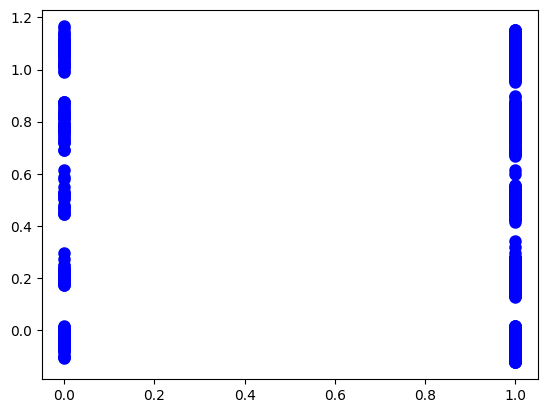

In [19]:
i=0
plt.scatter(X_test.iloc[:,i], y_test,  color='black')
plt.scatter(X_test.iloc[:,i], y_predicted, color='blue', linewidth=3)

In [20]:
y_pred_class=np.rint(y_predicted)
y_pred_class[y_pred_class>1]=1
y_pred_class[y_pred_class<0]=0
y_pred_class=y_pred_class.astype('int')
score=np.sum(y_pred_class==y_test)/len(y_test)
score

0.9726848767488341

Этот код выполняет бинарную классификацию, округляя предсказанные значения (y_predicted) до ближайшего целого числа с использованием np.rint(). Затем значения класса ограничиваются между 0 и 1, и преобразуются в целочисленный тип. Оценка точности классификации вычисляется сравнением предсказанных классов (y_pred_class) с фактическими классами (y_test). Результат score представляет собой долю правильных предсказаний.

In [21]:
#### Создаем матрицу неточности

Text(0.5, 1.1, 'Confusion matrix Logistic Regression\n')

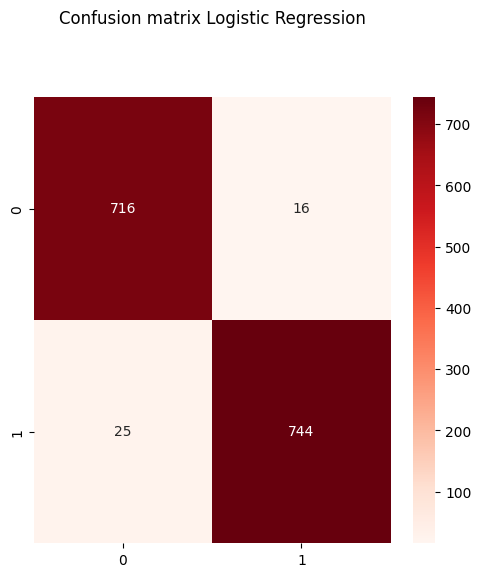

In [22]:
fig = plt.figure(figsize = (5,5))
ax = fig.gca()

cnf_matrix_log = confusion_matrix(y_test, y_pred_class)

sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="Reds" , fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Logistic Regression\n', y=1.1)

Матрица неточности сравнивает фактические классы (y_test) с предсказанными классами (y_pred_class). Тепловая карта с использованием sns.heatmap обозначает значения матрицы с цветами, где яркий цвет указывает на более высокие значения.

In [23]:
precision, recall, thresholds = roc_curve(y_test.ravel(), y_predicted.ravel())
precision, recall, thresholds

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

recision (точность): Значения, перечисленные в первом массиве, представляют точность для различных порогов. Н Рассчитывается как отношение истинных положительных случаев к общему числу предсказанных положительных случаев.

recall  (полнота): Значения, перечисленные во втором массиве, представляют полноту для соответствующих порогов.  Рассчитывается как отношение истинных положительных случаев к общему числу фактических положительных случаев.

thresholds (пороги): Представляют собой значения, используемые для разделения классов. Кривая точность-полнота строится для различных порогов.


#### ROC - анализ
Определим долю ложноположительных результатов и верноположительных результатов

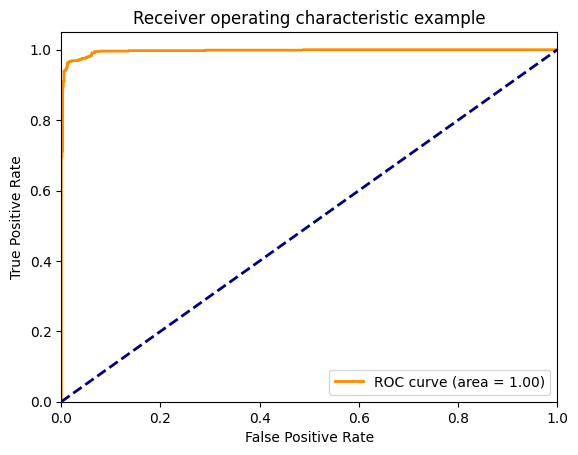

In [24]:
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, thresholds = roc_curve(y_test, y_predicted)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Пунктирная линия соответствует случайному классификатору, а кривая ROC стремится к верхнему левому углу графика. Площадь под кривой измеряет общую производительность классификатора: чем ближе к 1, тем лучше.

# Логистическая регрессия

In [25]:
data = df
X = data.drop('gender_num', axis=1)
y = data.gender_num
data

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender_num
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,0
4997,1,11.9,5.4,0,0,0,0,0
4998,1,12.9,5.7,0,0,0,0,0
4999,1,13.2,6.2,0,0,0,0,0


#### Разбиваем выборку на обучающую и тестовую

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=0)

#### Hастройка параметров модели

In [27]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
y_scor=model.fit(X_train_scaled, y_train)
y_score=y_scor.predict(X_test_scaled)

#### Оценка точности модели

In [28]:
print(classification_report(y_test, y_score))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1223
           1       0.97      0.97      0.97      1278

    accuracy                           0.97      2501
   macro avg       0.97      0.97      0.97      2501
weighted avg       0.97      0.97      0.97      2501



Предоставляет метрики точности (precision), полноты (recall) и F1-меры для каждого класса (0 и 1), а также средние значения по всем классам.

Precision: Доля правильно предсказанных положительных случаев от общего числа предсказанных положтельных случаев. Recall: Доля правильно предсказанных положительных случаев от общего числа фактических положительных случаев. F1-Score: среднее гармоническое между точностью и полнотой. 
Интерпретации 
    
Для класса 0: модель достаточно хорошо предсказывает, но с небольшим превышением false positiv
    
Для класса 1: аналогичная ситуация, но с небольшим превышением false negativ
    
Модель имеет точность около 97%, что указывает на её высокую эффективность в данной задаче классификации.

#### Матрица неточности

Text(0.5, 1.1, 'Confusion matrix Logistic Regression\n')

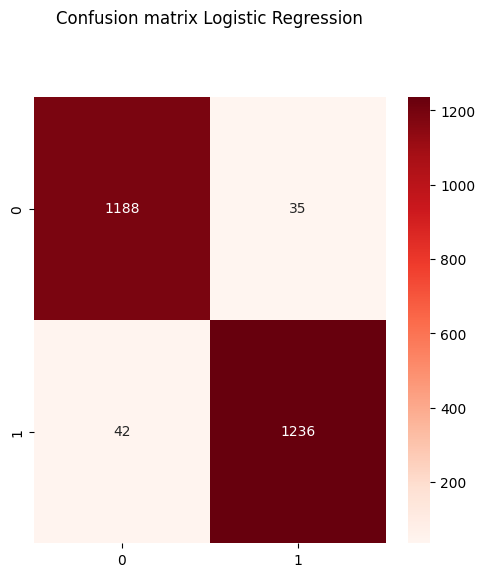

In [29]:
fig = plt.figure(figsize = (5,5))
ax = fig.gca()

cnf_matrix_log = confusion_matrix(y_test, y_score)

sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="Reds" , fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Logistic Regression\n', y=1.1)

 Построение и визуализации матрицы неточности (confusion matrix) для модели логистической регрессии. Матрица неточности позволяет оценить производительность классификации, отображая количество верно и неверно классифицированных примеров.
 
 • True Positive (TP): Количество правильно предсказанных положительных случаев.
 
 • True Negative (TN): Количество правильно предсказанных отрицательных случаев.
 
 • False Positive (FP): Количество неверно предсказанных положительных случаев.
 
 • False Negative (FN): Количество неверно предсказанных отрицательных случели.

In [30]:
precision, recall, thresholds = roc_curve(y_test.ravel(), y_score.ravel())
precision, recall, thresholds

(array([0.        , 0.02861815, 1.        ]),
 array([0.        , 0.96713615, 1.        ]),
 array([inf,  1.,  0.]))

Эти массивы представляют значения точности, полноты и порогов для построения кривой ROC.

 • Precision (точность): Принимает значения 0.0, 0.02861815 и 1.0 для различных порогов.
 
 • Recall (полнота): Принимает значения 0.0, 0.96713615 и 1.0 для соответствующих порогов.
 
 • Thresholds (пороги): Используются для разделения классов и принимают значения бесконечность (inf), 1.0 и 0.0.
 

In [31]:
f1_score(y_test, y_score)

0.9697920753236563

0.97 это число отражает баланс между точностью и полнотой, предоставляя обобщенную оценку эффективности модели в задачах бинарной классификации.

#### ROC - анализ

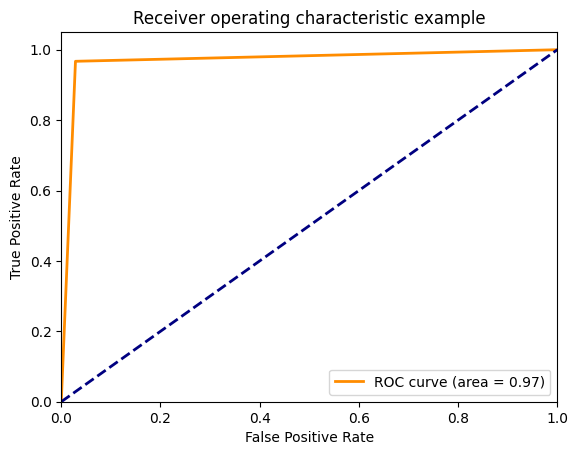

In [32]:
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Чем ближе значение AUC-ROC к 1, тем лучше производительность модели

In [38]:
X_cut = X[['long_hair', 'forehead_height_cm', 'forehead_width_cm', 'lips_thin']]
X_cut

,long_hair,forehead_height_cm,forehead_width_cm,lips_thin
0,1,6.1,11.8,1
1,0,5.4,14.0,1
2,0,6.3,11.8,1
3,0,6.1,14.4,1
4,1,5.9,13.5,0
...,...,...,...,...
4996,1,5.1,13.6,0
4997,1,5.4,11.9,0
4998,1,5.7,12.9,0
4999,1,6.2,13.2,0


#### Разбиваем выборку на обучающую и тестовую

In [39]:
Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_cut, y, test_size=.5, random_state=0)

#### Настройка параметров модели

In [40]:
scaler = StandardScaler()
Xc_train_scaled = scaler.fit_transform(Xc_train)
Xc_test_scaled = scaler.transform(Xc_test)

model = LogisticRegression()
yc_scor=model.fit(Xc_train_scaled, yc_train)
yc_score=yc_scor.predict(Xc_test_scaled)

print(classification_report(yc_test, yc_score))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1223
           1       0.88      0.88      0.88      1278

    accuracy                           0.88      2501
   macro avg       0.88      0.88      0.88      2501
weighted avg       0.88      0.88      0.88      2501



#### Матрица неточности

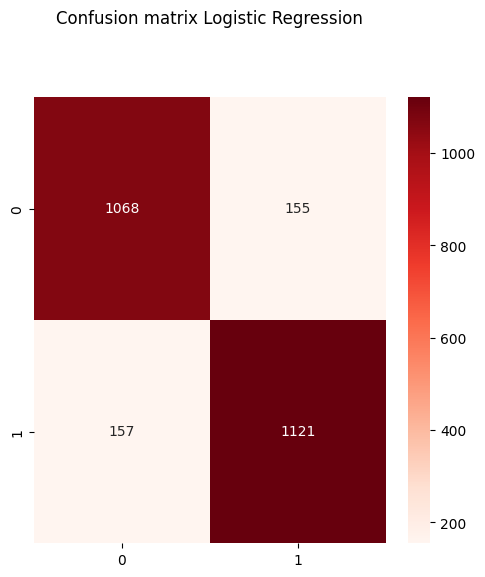

In [41]:
fig = plt.figure(figsize = (5,5))
ax = fig.gca()

cnf_matrix_log = confusion_matrix(yc_test, yc_score)

sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="Reds" , fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Logistic Regression\n', y=1.1)
plt.show()

#### ROC - анализ

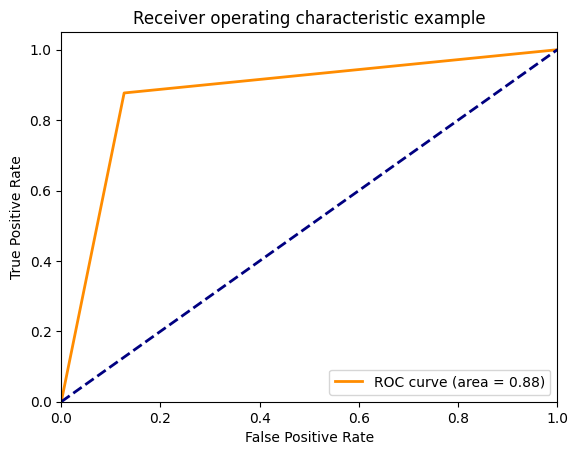

In [42]:
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, thresholds = roc_curve(yc_test, yc_score)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()